### Importación de datos



In [11]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



=== ANÁLISIS DE FACTURACIÓN TOTAL POR TIENDA ===

Tienda 1: $1,150,880,400.0
Tienda 2: $1,116,343,500.0
Tienda 3: $1,098,019,600.0
Tienda 4: $1,038,375,700.0

🟢 Mejor tienda: Tienda 1 - $1,150,880,400.0
🔴 Peor tienda: Tienda 4 - $1,038,375,700.0


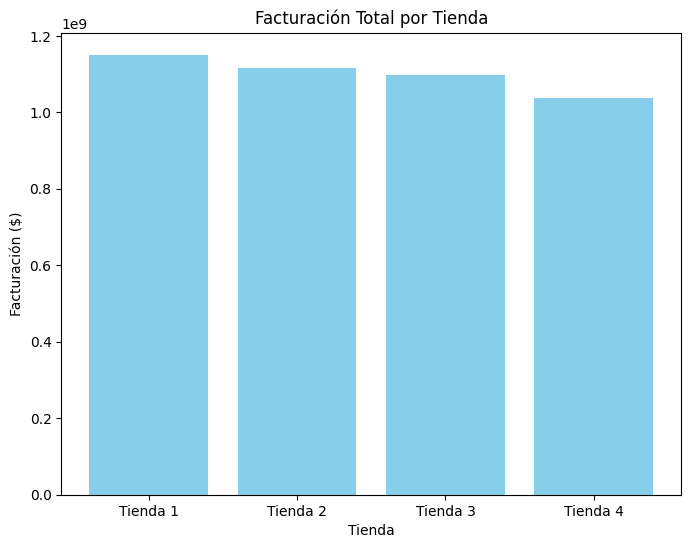

In [5]:
# 1. Análisis de facturación total por tienda
import matplotlib.pyplot as plt

print("=== ANÁLISIS DE FACTURACIÓN TOTAL POR TIENDA ===\n")

# Código compacto pero claro
tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = [f"Tienda {i}" for i in range(1, 5)]
facturacion = [sum(tienda['Precio']) for tienda in tiendas_data]

# Mostrar resultados
for i, fact in enumerate(facturacion):
    print(f"{tiendas_nombres[i]}: ${fact:,}")

# Análisis adicional
mejor_indice = facturacion.index(max(facturacion))
peor_indice = facturacion.index(min(facturacion))

print(f"\n🟢 Mejor tienda: {tiendas_nombres[mejor_indice]} - ${max(facturacion):,}")
print(f"🔴 Peor tienda: {tiendas_nombres[peor_indice]} - ${min(facturacion):,}")

# Visualización
plt.figure(figsize=(8, 6))
plt.bar(tiendas_nombres, facturacion, color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.show()

# 2. Ventas por categoría

=== ANÁLISIS DE CATEGORÍAS MÁS POPULARES POR TIENDA ===


Tienda 1:
  • Muebles: 465 ventas
  • Electrónicos: 448 ventas
  • Juguetes: 324 ventas

Tienda 2:
  • Muebles: 442 ventas
  • Electrónicos: 422 ventas
  • Juguetes: 313 ventas

Tienda 3:
  • Muebles: 499 ventas
  • Electrónicos: 451 ventas
  • Juguetes: 315 ventas

Tienda 4:
  • Muebles: 480 ventas
  • Electrónicos: 451 ventas
  • Juguetes: 338 ventas

=== CATEGORÍAS MÁS POPULARES GLOBALMENTE ===


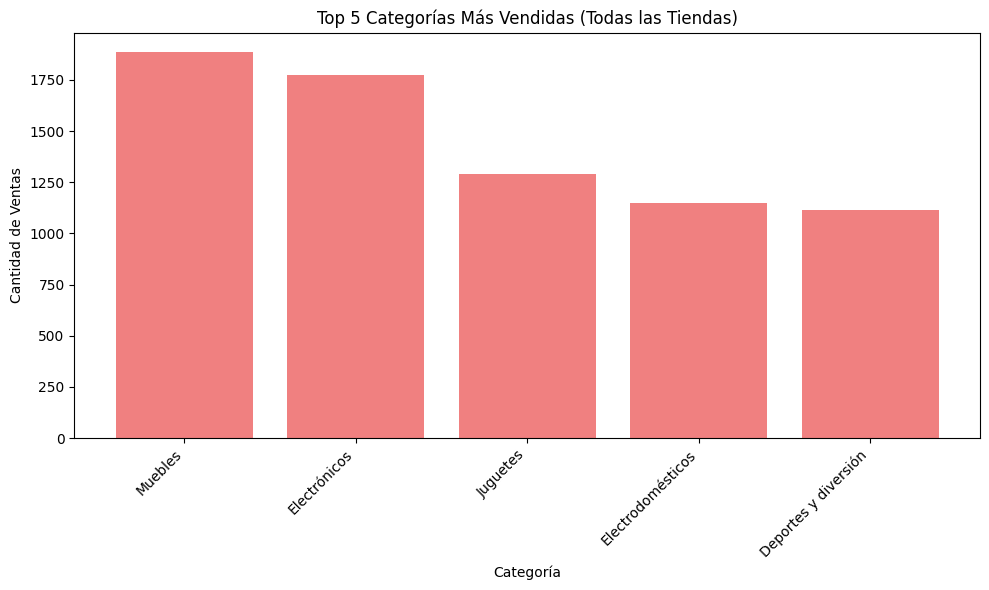


🎯 Tienda con mayor diversidad: Tienda 1 (8 categorías únicas)


In [6]:
# 2. Análisis de ventas por categoría
import matplotlib.pyplot as plt

print("=== ANÁLISIS DE CATEGORÍAS MÁS POPULARES POR TIENDA ===\n")

# Obtener categorías más populares por tienda
tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = [f"Tienda {i}" for i in range(1, 5)]

for i, tienda in enumerate(tiendas_data):
    print(f"\n{tiendas_nombres[i]}:")
    top_categorias = tienda['Categoría del Producto'].value_counts().head(3)
    for categoria, cantidad in top_categorias.items():
        print(f"  • {categoria}: {cantidad} ventas")

# Visualización: Categorías más vendidas en general
print("\n=== CATEGORÍAS MÁS POPULARES GLOBALMENTE ===")
todas_categorias = []
for tienda in tiendas_data:
    todas_categorias.extend(tienda['Categoría del Producto'].tolist())

import pandas as pd
categorias_globales = pd.Series(todas_categorias).value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.bar(categorias_globales.index, categorias_globales.values, color='lightcoral')
plt.title('Top 5 Categorías Más Vendidas (Todas las Tiendas)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identificar tienda con mayor diversidad de categorías
diversidad = [len(tienda['Categoría del Producto'].unique()) for tienda in tiendas_data]
tienda_mas_diversa = tiendas_nombres[diversidad.index(max(diversidad))]
print(f"\n🎯 Tienda con mayor diversidad: {tienda_mas_diversa} ({max(diversidad)} categorías únicas)")

# 3. Calificación promedio de la tienda


=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===

Tienda 1: 3.98 ⭐
Tienda 2: 4.04 ⭐
Tienda 3: 4.05 ⭐
Tienda 4: 4.00 ⭐

🟢 Mejor calificada: Tienda 3 (4.05 ⭐)
🔴 Peor calificada: Tienda 1 (3.98 ⭐)


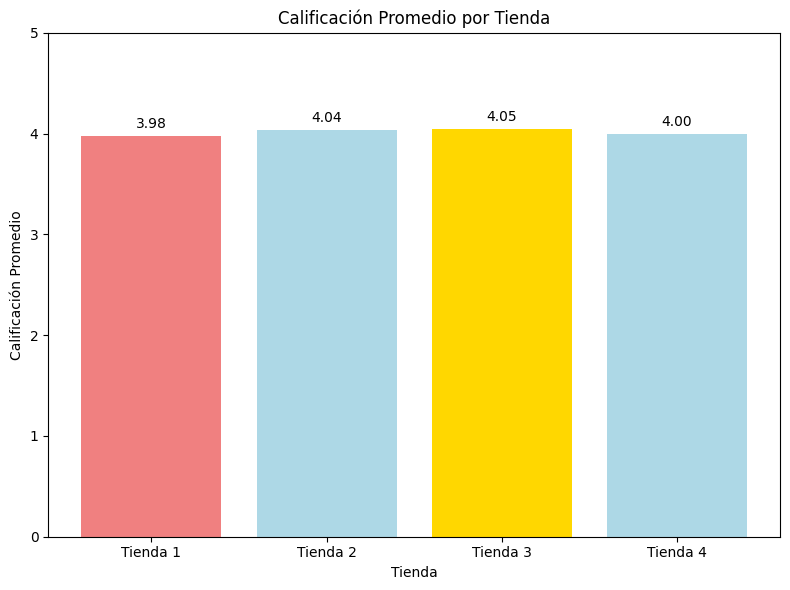


📊 Rango de calificaciones: 3.98 - 4.05
📊 Diferencia entre mejor y peor: 0.07 puntos


In [7]:
# 3. Análisis de calificación promedio por tienda
import matplotlib.pyplot as plt
import numpy as np

print("=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===\n")

# Calcular calificación promedio por tienda
tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = [f"Tienda {i}" for i in range(1, 5)]
calificaciones = [tienda['Calificación'].mean() for tienda in tiendas_data]

# Mostrar resultados
for i, calif in enumerate(calificaciones):
    print(f"{tiendas_nombres[i]}: {calif:.2f} ⭐")

# Identificar mejor y peor calificación
mejor_calif_idx = calificaciones.index(max(calificaciones))
peor_calif_idx = calificaciones.index(min(calificaciones))

print(f"\n🟢 Mejor calificada: {tiendas_nombres[mejor_calif_idx]} ({max(calificaciones):.2f} ⭐)")
print(f"🔴 Peor calificada: {tiendas_nombres[peor_calif_idx]} ({min(calificaciones):.2f} ⭐)")

# Visualización
plt.figure(figsize=(8, 6))
colors = ['gold' if calif == max(calificaciones) else 'lightcoral' if calif == min(calificaciones) else 'lightblue' for calif in calificaciones]
bars = plt.bar(tiendas_nombres, calificaciones, color=colors)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)

# Agregar valores en las barras
for bar, calif in zip(bars, calificaciones):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{calif:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis adicional: distribución de calificaciones
print(f"\n📊 Rango de calificaciones: {min(calificaciones):.2f} - {max(calificaciones):.2f}")
print(f"📊 Diferencia entre mejor y peor: {max(calificaciones) - min(calificaciones):.2f} puntos")

# 4. Productos más y menos vendidos

=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===


Tienda 1:
  🔥 MÁS VENDIDOS:
    1. Microondas: 60 unidades
    2. TV LED UHD 4K: 60 unidades
    3. Armario: 60 unidades
  ❄️ MENOS VENDIDOS:
    1. Olla de presión: 35 unidades
    2. Auriculares con micrófono: 33 unidades
    3. Celular ABXY: 33 unidades

Tienda 2:
  🔥 MÁS VENDIDOS:
    1. Iniciando en programación: 65 unidades
    2. Microondas: 62 unidades
    3. Batería: 61 unidades
  ❄️ MENOS VENDIDOS:
    1. Mesa de comedor: 34 unidades
    2. Impresora: 34 unidades
    3. Juego de mesa: 32 unidades

Tienda 3:
  🔥 MÁS VENDIDOS:
    1. Kit de bancas: 57 unidades
    2. Mesa de comedor: 56 unidades
    3. Cama king: 56 unidades
  ❄️ MENOS VENDIDOS:
    1. Mochila: 36 unidades
    2. Microondas: 36 unidades
    3. Bloques de construcción: 35 unidades

Tienda 4:
  🔥 MÁS VENDIDOS:
    1. Cama box: 62 unidades
    2. Cubertería: 59 unidades
    3. Dashboards con Power BI: 56 unidades
  ❄️ MENOS VENDIDOS:
    1. Guitarra acústica: 37

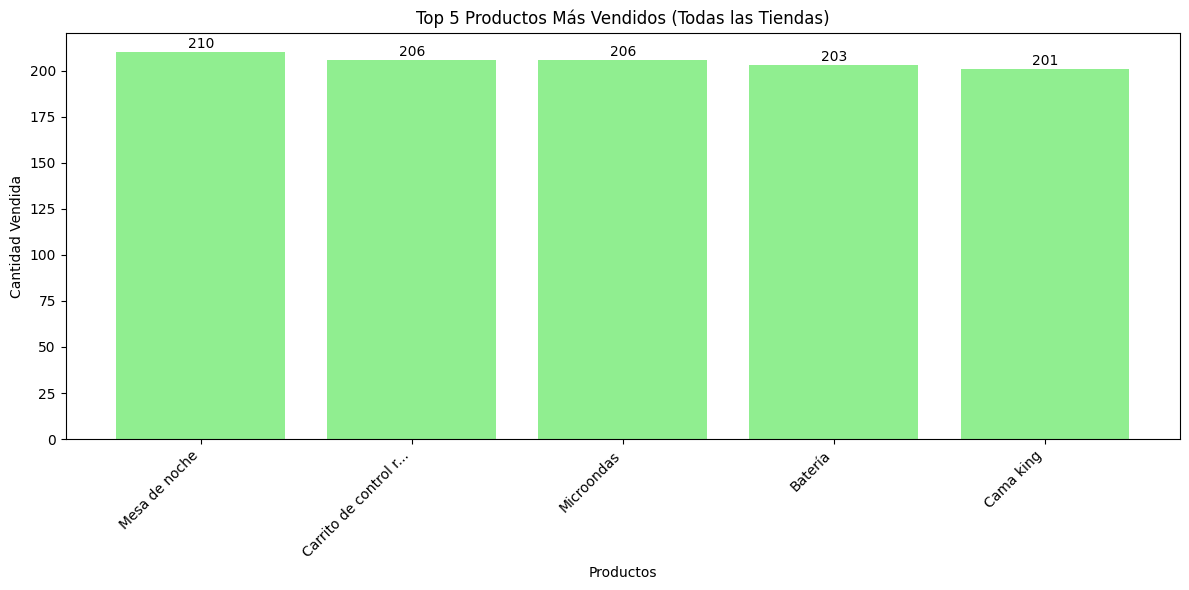


📊 Total de productos únicos en todas las tiendas: 51
📊 Producto más popular representa el 2.2% de todas las ventas


In [8]:
# 4. Análisis de productos más y menos vendidos por tienda
import matplotlib.pyplot as plt

print("=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===\n")

tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = [f"Tienda {i}" for i in range(1, 5)]

# Análisis por tienda
for i, tienda in enumerate(tiendas_data):
    print(f"\n{tiendas_nombres[i]}:")
    productos_vendidos = tienda['Producto'].value_counts()

    # Top 3 más vendidos
    print("  🔥 MÁS VENDIDOS:")
    for j, (producto, cantidad) in enumerate(productos_vendidos.head(3).items(), 1):
        print(f"    {j}. {producto}: {cantidad} unidades")

    # Top 3 menos vendidos
    print("  ❄️ MENOS VENDIDOS:")
    for j, (producto, cantidad) in enumerate(productos_vendidos.tail(3).items(), 1):
        print(f"    {j}. {producto}: {cantidad} unidades")

# Análisis global: producto más vendido de todas las tiendas
print("\n=== RANKING GLOBAL DE PRODUCTOS ===")
todos_productos = []
for tienda in tiendas_data:
    todos_productos.extend(tienda['Producto'].tolist())

import pandas as pd
productos_globales = pd.Series(todos_productos).value_counts()

print("\n🏆 TOP 5 PRODUCTOS MÁS VENDIDOS (TODAS LAS TIENDAS):")
for i, (producto, cantidad) in enumerate(productos_globales.head(5).items(), 1):
    print(f"{i}. {producto}: {cantidad} unidades")

# Visualización: Top 5 productos más vendidos globalmente
plt.figure(figsize=(12, 6))
top_productos = productos_globales.head(5)
plt.bar(range(len(top_productos)), top_productos.values, color='lightgreen')
plt.title('Top 5 Productos Más Vendidos (Todas las Tiendas)')
plt.xlabel('Productos')
plt.ylabel('Cantidad Vendida')
plt.xticks(range(len(top_productos)), [p[:20] + '...' if len(p) > 20 else p for p in top_productos.index], rotation=45, ha='right')

# Agregar valores en las barras
for i, valor in enumerate(top_productos.values):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Insight sobre diversidad de productos
total_productos_unicos = len(productos_globales)
print(f"\n📊 Total de productos únicos en todas las tiendas: {total_productos_unicos}")
print(f"📊 Producto más popular representa el {(productos_globales.iloc[0]/len(todos_productos)*100):.1f}% de todas las ventas")

# 5. Envío promedio por tienda

=== ANÁLISIS DE COSTO DE ENVÍO PROMEDIO POR TIENDA ===

Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46

🟢 Envío más económico: Tienda 4 ($23,459.46)
🔴 Envío más costoso: Tienda 1 ($26,018.61)
💰 Diferencia entre más caro y más barato: $2,559.15


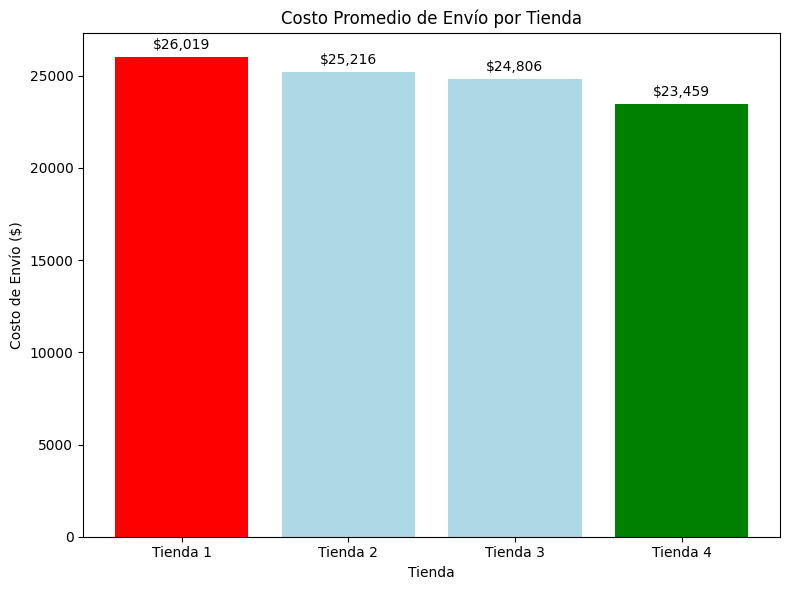


📊 ANÁLISIS DE EFICIENCIA LOGÍSTICA:
Tienda 1: $26,018.61 por venta
Tienda 2: $25,216.24 por venta
Tienda 3: $24,805.68 por venta
Tienda 4: $23,459.46 por venta

🎯 Tienda más eficiente logísticamente: Tienda 4


In [9]:
# 5. Análisis de costo de envío promedio por tienda
import matplotlib.pyplot as plt

print("=== ANÁLISIS DE COSTO DE ENVÍO PROMEDIO POR TIENDA ===\n")

tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = [f"Tienda {i}" for i in range(1, 5)]
costos_envio = [tienda['Costo de envío'].mean() for tienda in tiendas_data]

# Mostrar resultados
for i, costo in enumerate(costos_envio):
    print(f"{tiendas_nombres[i]}: ${costo:,.2f}")

# Identificar tienda más económica y más costosa en envíos
mas_economica_idx = costos_envio.index(min(costos_envio))
mas_costosa_idx = costos_envio.index(max(costos_envio))

print(f"\n🟢 Envío más económico: {tiendas_nombres[mas_economica_idx]} (${min(costos_envio):,.2f})")
print(f"🔴 Envío más costoso: {tiendas_nombres[mas_costosa_idx]} (${max(costos_envio):,.2f})")

# Calcular impacto en costos
diferencia_costo = max(costos_envio) - min(costos_envio)
print(f"💰 Diferencia entre más caro y más barato: ${diferencia_costo:,.2f}")

# Visualización
plt.figure(figsize=(8, 6))
colors = ['green' if costo == min(costos_envio) else 'red' if costo == max(costos_envio) else 'lightblue' for costo in costos_envio]
bars = plt.bar(tiendas_nombres, costos_envio, color=colors)
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío ($)')

# Agregar valores en las barras
for bar, costo in zip(bars, costos_envio):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(costos_envio)*0.01,
             f'${costo:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Análisis adicional: eficiencia logística
total_ventas = [len(tienda) for tienda in tiendas_data]
costo_envio_total = [tienda['Costo de envío'].sum() for tienda in tiendas_data]

print(f"\n📊 ANÁLISIS DE EFICIENCIA LOGÍSTICA:")
for i in range(len(tiendas_nombres)):
    costo_por_venta = costo_envio_total[i] / total_ventas[i]
    print(f"{tiendas_nombres[i]}: ${costo_por_venta:,.2f} por venta")

# Identificar la más eficiente
costos_por_venta = [costo_envio_total[i] / total_ventas[i] for i in range(len(tiendas_nombres))]
mas_eficiente_idx = costos_por_venta.index(min(costos_por_venta))
print(f"\n🎯 Tienda más eficiente logísticamente: {tiendas_nombres[mas_eficiente_idx]}")

In [10]:
# INFORME EJECUTIVO Y RECOMENDACIÓN FINAL
print("=" * 60)
print("INFORME EJECUTIVO PARA EL SR. JUAN")
print("ANÁLISIS DE RENDIMIENTO - ALURA STORE")
print("=" * 60)

# Recopilar todos los datos analizados
tiendas_nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
tiendas_data = [tienda1, tienda2, tienda3, tienda4]

# Métricas consolidadas
facturacion = [sum(tienda['Precio']) for tienda in tiendas_data]
calificaciones = [tienda['Calificación'].mean() for tienda in tiendas_data]
costos_envio = [tienda['Costo de envío'].mean() for tienda in tiendas_data]
total_ventas = [len(tienda) for tienda in tiendas_data]

print("\nRESUMEN EJECUTIVO:")
print("-" * 40)

# Tabla comparativa
print(f"{'TIENDA':<12} {'FACTURACIÓN':<15} {'CALIFICACIÓN':<15} {'COSTO ENVÍO':<15} {'VENTAS':<10}")
print("-" * 70)
for i in range(4):
    print(f"{tiendas_nombres[i]:<12} ${facturacion[i]:>12,.0f} {calificaciones[i]:>13.2f} ${costos_envio[i]:>12,.0f} {total_ventas[i]:>8}")

print("\nANÁLISIS POR MÉTRICA:")
print("-" * 40)

# Análisis de facturación
print("FACTURACIÓN:")
mejor_facturacion_idx = facturacion.index(max(facturacion))
peor_facturacion_idx = facturacion.index(min(facturacion))
print(f"  Mejor rendimiento: {tiendas_nombres[mejor_facturacion_idx]} (${max(facturacion):,.0f})")
print(f"  Peor rendimiento: {tiendas_nombres[peor_facturacion_idx]} (${min(facturacion):,.0f})")

# Análisis de satisfacción
print("\nSATISFACCIÓN DEL CLIENTE:")
mejor_calificacion_idx = calificaciones.index(max(calificaciones))
peor_calificacion_idx = calificaciones.index(min(calificaciones))
print(f"  Mejor calificada: {tiendas_nombres[mejor_calificacion_idx]} ({max(calificaciones):.2f}/5.0)")
print(f"  Peor calificada: {tiendas_nombres[peor_calificacion_idx]} ({min(calificaciones):.2f}/5.0)")

# Análisis de costos operativos
print("\nEFICIENCIA OPERATIVA:")
mejor_envio_idx = costos_envio.index(min(costos_envio))
peor_envio_idx = costos_envio.index(max(costos_envio))
print(f"  Menor costo de envío: {tiendas_nombres[mejor_envio_idx]} (${min(costos_envio):.0f})")
print(f"  Mayor costo de envío: {tiendas_nombres[peor_envio_idx]} (${max(costos_envio):.0f})")

# Sistema de puntuación para determinar la peor tienda
print("\nSISTEMA DE EVALUACIÓN INTEGRAL:")
print("-" * 40)

# Calcular ranking por métrica (1 = mejor, 4 = peor)
rankings = []
for i in range(4):
    rank_facturacion = sorted(range(4), key=lambda k: facturacion[k], reverse=True).index(i) + 1
    rank_calificacion = sorted(range(4), key=lambda k: calificaciones[k], reverse=True).index(i) + 1
    rank_costo_envio = sorted(range(4), key=lambda k: costos_envio[k]).index(i) + 1  # Menor costo = mejor

    score_total = rank_facturacion + rank_calificacion + rank_costo_envio
    rankings.append(score_total)

    print(f"{tiendas_nombres[i]}: Puntuación total = {score_total}")
    print(f"  - Facturación: Posición {rank_facturacion}")
    print(f"  - Calificación: Posición {rank_calificacion}")
    print(f"  - Eficiencia envío: Posición {rank_costo_envio}")

# Identificar la tienda con peor desempeño general
peor_tienda_idx = rankings.index(max(rankings))
mejor_tienda_idx = rankings.index(min(rankings))

print("\n" + "=" * 60)
print("RECOMENDACIÓN FINAL")
print("=" * 60)

print(f"\nBasado en el análisis integral de las cuatro tiendas de Alura Store, ")
print(f"recomiendo vender la {tiendas_nombres[peor_tienda_idx]}.")

print(f"\nJUSTIFICACIÓN:")
print(f"La {tiendas_nombres[peor_tienda_idx]} presenta el peor desempeño general con:")
print(f"  - Facturación: ${facturacion[peor_tienda_idx]:,.0f} ")
print(f"  - Calificación promedio: {calificaciones[peor_tienda_idx]:.2f}/5.0")
print(f"  - Costo de envío promedio: ${costos_envio[peor_tienda_idx]:.0f}")

diferencia_facturacion = max(facturacion) - facturacion[peor_tienda_idx]
print(f"\nIMPACTO ECONÓMICO:")
print(f"La diferencia de facturación con la mejor tienda es de ${diferencia_facturacion:,.0f},")
print(f"lo que representa una oportunidad de optimización significativa.")

print(f"\nEn contraste, la {tiendas_nombres[mejor_tienda_idx]} muestra el mejor rendimiento general")
print(f"y debería mantenerse como referencia para las operaciones futuras.")

print(f"\nEsta decisión permitirá al Sr. Juan concentrar recursos en las tiendas")
print(f"más rentables y liberar capital para su nuevo emprendimiento.")


INFORME EJECUTIVO PARA EL SR. JUAN
ANÁLISIS DE RENDIMIENTO - ALURA STORE

RESUMEN EJECUTIVO:
----------------------------------------
TIENDA       FACTURACIÓN     CALIFICACIÓN    COSTO ENVÍO     VENTAS    
----------------------------------------------------------------------
Tienda 1     $1,150,880,400          3.98 $      26,019     2359
Tienda 2     $1,116,343,500          4.04 $      25,216     2359
Tienda 3     $1,098,019,600          4.05 $      24,806     2359
Tienda 4     $1,038,375,700          4.00 $      23,459     2358

ANÁLISIS POR MÉTRICA:
----------------------------------------
FACTURACIÓN:
  Mejor rendimiento: Tienda 1 ($1,150,880,400)
  Peor rendimiento: Tienda 4 ($1,038,375,700)

SATISFACCIÓN DEL CLIENTE:
  Mejor calificada: Tienda 3 (4.05/5.0)
  Peor calificada: Tienda 1 (3.98/5.0)

EFICIENCIA OPERATIVA:
  Menor costo de envío: Tienda 4 ($23459)
  Mayor costo de envío: Tienda 1 ($26019)

SISTEMA DE EVALUACIÓN INTEGRAL:
----------------------------------------
Tienda